In [6]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import cmocean

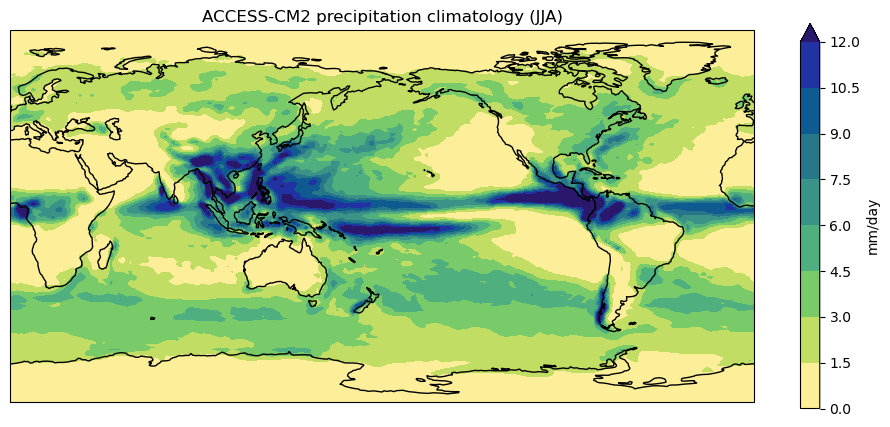

In [24]:
file = 'data/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'

dset = xr.open_dataset(accesscm2_pr_file)
model = dset.attrs['source_id']

clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True) 
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day'

fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
clim.sel(season='JJA').plot.contourf(ax=ax,
                   levels=np.arange(0, 13.5, 1.5),
                   extend='max',
                   transform=ccrs.PlateCarree(),
                   cbar_kwargs={'label': clim.units},
                   cmap=cmocean.cm.haline_r)
ax.coastlines()
ax.set_title(f'{model} precipitation climatology (JJA)')
plt.show()



In [44]:
def convert_pr_units(darray):
    """Convert kg m-2 s-1 to mm day-1.
   
    Args:
      darray (xarray.DataArray): Precipitation data
   
    """
   
    darray.data = darray.data * 86400
    darray.attrs['units'] = 'mm/day'
   
    return darray


def create_plot(clim, model, season, gridlines=False):
    """Plot the precipitation climatology.
   
    Args:
      clim (xarray.DataArray): Precipitation climatology data
      model (str) : Name of the climate model
      season (str): Season 
   
    Kwargs:  
      gridlines (bool): Select whether to plot gridlines    
   
    """
       
    fig = plt.figure(figsize=[12,5])
    ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
    clim.sel(season=season).plot.contourf(ax=ax,
                                          levels=np.arange(0, 13.5, 1.5),
                                          extend='max',
                                          transform=ccrs.PlateCarree(),
                                          cbar_kwargs={'label': clim.units},
                                          cmap=cmocean.cm.haline_r)
    ax.coastlines()
    if gridlines:
        plt.gca().gridlines()
   
    title = f'{model} precipitation climatology ({season})'
    plt.title(title)


def plot_pr_climatology(pr_file, season, gridlines=False):
    """Plot the precipitation climatology.

    Args:
      pr_file (str): Precipitation data file
      season (str): Season (3 letter abbreviation, e.g. JJA)
      gridlines (bool): Select whether to plot gridlines

    """

    dset = xr.open_dataset(pr_file)
    clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)
    clim = convert_pr_units(clim)
    create_plot(clim, dset.attrs['source_id'], season, gridlines=gridlines)
    plt.show()



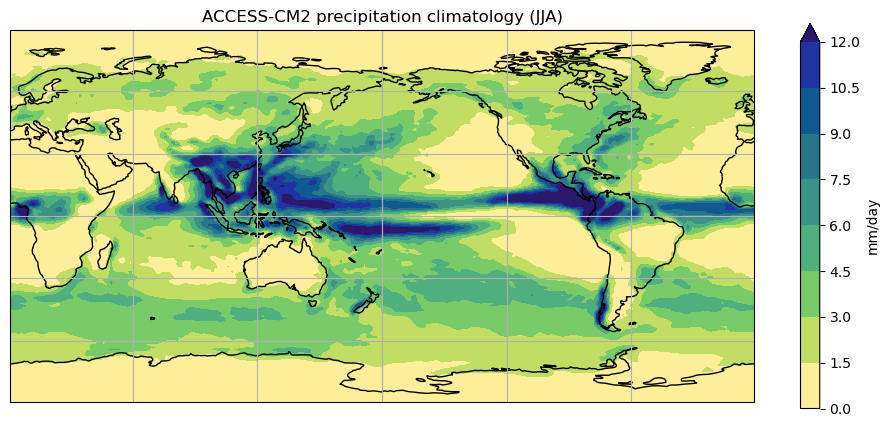

In [43]:
plot_pr_climatology(file,'JJA',gridlines=True)